In [1]:
import csv
import patsy
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

C:\Users\Jimmy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
players = pd.read_csv("output.csv", encoding='latin-1')

In [3]:
players = players[players.Year != "Career Totals"]
players.loc[1570] = ["Ismael Tajouri-Shradi", "2018", "Forward", "New York City FC", 7, 5, 4, 371, 1, 7, 4, 4, 1, 1, 0]
players = players[players.GP > 3]
players = players.groupby(["Player", "Year"]).first().reset_index()
players["Player"] = players.Player.str.rstrip()
players.head()

,Player,Year,Position,Club,GP,GS,G,MINS,A,SHTS,SOG,FC,OFF,Y,R
0,A.J. DeLaGarza,2009,Defender,Los Angeles Galaxy,22,21,1,1754,1,3,2,14,0,2,0
1,A.J. DeLaGarza,2010,Defender,Los Angeles Galaxy,17,14,1,1307,0,1,1,14,1,3,0
2,A.J. DeLaGarza,2011,Defender,LA Galaxy,30,30,0,2627,0,3,1,31,1,3,0
3,A.J. DeLaGarza,2012,Defender,LA Galaxy,30,30,0,2644,0,1,0,41,0,4,0
4,A.J. DeLaGarza,2013,Defender,LA Galaxy,28,28,0,2399,0,2,1,22,0,3,0


In [4]:
#sns.pairplot(players.iloc[:, 3:]);

In [5]:
players_adj = players.copy(deep = True)
players_adj[['G', 'A', 'SHTS', 'SOG', "FC", 'OFF', 'Y', 'R']] = players_adj[['G', 'A', 'SHTS', 'SOG', "FC", 'OFF', 'Y', 'R']].div(players.GP, axis=0)
#pd.options.display.float_format = '{:,.4f}'.format
players_adj.head()

,Player,Year,Position,Club,GP,GS,G,MINS,A,SHTS,SOG,FC,OFF,Y,R
0,A.J. DeLaGarza,2009,Defender,Los Angeles Galaxy,22,21,0.045455,1754,0.045455,0.136364,0.090909,0.636364,0.000000,0.090909,0.0
1,A.J. DeLaGarza,2010,Defender,Los Angeles Galaxy,17,14,0.058824,1307,0.000000,0.058824,0.058824,0.823529,0.058824,0.176471,0.0
2,A.J. DeLaGarza,2011,Defender,LA Galaxy,30,30,0.000000,2627,0.000000,0.100000,0.033333,1.033333,0.033333,0.100000,0.0
3,A.J. DeLaGarza,2012,Defender,LA Galaxy,30,30,0.000000,2644,0.000000,0.033333,0.000000,1.366667,0.000000,0.133333,0.0
4,A.J. DeLaGarza,2013,Defender,LA Galaxy,28,28,0.000000,2399,0.000000,0.071429,0.035714,0.785714,0.000000,0.107143,0.0


In [6]:
test = players_adj[players_adj.Year == "2018"]
train = players_adj[players_adj.Year != "2018"]
print(test.loc[test['Player'] == "Josef Martinez"])

             Player  Year Position            Club  GP  GS         G  MINS  \
819  Josef Martinez  2018  Forward  Atlanta United   7   7  0.857143   609   

       A  SHTS       SOG   FC       OFF    Y    R  
819  0.0   2.0  1.142857  1.0  1.428571  0.0  0.0  


In [7]:
#y, X = patsy.dmatrices('G ~  A + SHTS + SOG + FC + OFF + Y + R', data=train, return_type="dataframe")
y, X = patsy.dmatrices('G ~ SHTS + SOG + OFF', data=train, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1538.
Date:                Mon, 30 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:42:05   Log-Likelihood:                 1689.4
No. Observations:                1291   AIC:                            -3371.
Df Residuals:                    1287   BIC:                            -3350.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0078      0.003     -2.666      0.008      -0.014      -0.002
SHTS          -0.0229      0.006     -3.604      0.000      -0.035      -0.010
SOG            0.3678      0.015     23.859      0.000       0.338       0.398
OFF            0.0498      0.011      4.657      0.000       0.029       0.071
==============================================================================
Omnibus:                      189.630   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.862
Skew:                           0.587   Prob(JB):                    2.22e-204
Kurtosis:                       7.007   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
test_players = test[test.Player == "David Villa"]
test_players = test_players.append(test[test.Player == "Alexander Ring"])
test_players = test_players.append(test[test.Player == "Rodney Wallace"])
test_players = test_players.append(test[test.Player == "Maximiliano Moralez"])
test_players = test_players.append(test[test.Player == "Jesus Medina"])
test_players = test_players.append(test[test.Player == "Yangel Herrera"])
test_players = test_players.append(test[test.Player == "Ben Sweat"])
test_players = test_players.append(test[test.Player == "Alexander Callens"])
test_players = test_players.append(test[test.Player == "Maxime Chanot"])
test_players = test_players.append(test[test.Player == "Anton Tinnerholm"])
print (test_players.shape)

(10, 15)


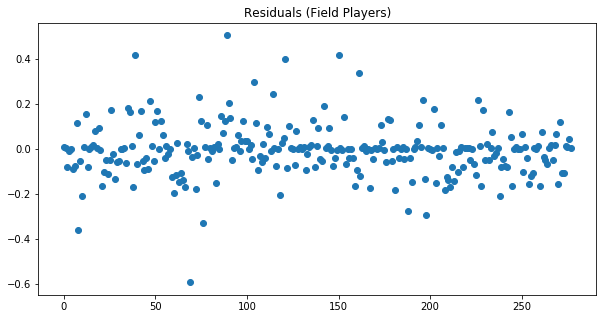

In [9]:
predictions = fit.predict(test[['G', 'SHTS', 'SOG', 'OFF']])
expected = 0.0
for prediction in predictions:
    expected += prediction
expected
residuals = (test.G - predictions).reset_index()
residuals = residuals.drop(["index"], 1)
residuals.plot(style = 'o', legend = False, title = "Residuals (Field Players)", figsize = (10,5))


In [10]:
#NYCFC
test_players = test[test.Player == "David Villa"]
test_players = test_players.append(test[test.Player == "Alexander Ring"])
test_players = test_players.append(test[test.Player == "Rodney Wallace"])
test_players = test_players.append(test[test.Player == "Maximiliano Moralez"])
test_players = test_players.append(test[test.Player == "Jesus Medina"])
test_players = test_players.append(test[test.Player == "Yangel Herrera"])
test_players = test_players.append(test[test.Player == "Ben Sweat"])
test_players = test_players.append(test[test.Player == "Alexander Callens"])
test_players = test_players.append(test[test.Player == "Sebastian Ibeagha"])
test_players = test_players.append(test[test.Player == "Anton Tinnerholm"])
print (test_players.head(10))

predictions = fit.predict(test_players[['G', 'SHTS', 'SOG', 'OFF']])
expected = 0.0
for prediction in predictions:
    expected += prediction
expected

                   Player  Year    Position              Club  GP  GS  \
417           David Villa  2018     Forward  New York City FC   5   3   
63         Alexander Ring  2018  Midfielder  New York City FC   6   5   
1261       Rodney Wallace  2018  Midfielder  New York City FC   5   4   
1089  Maximiliano Moralez  2018  Midfielder  New York City FC   8   8   
751          Jesus Medina  2018  Midfielder  New York City FC   8   7   
1553       Yangel Herrera  2018  Midfielder  New York City FC   8   7   
150             Ben Sweat  2018    Defender  New York City FC   5   5   
61      Alexander Callens  2018    Defender  New York City FC   8   8   
102      Anton Tinnerholm  2018    Defender  New York City FC   6   6   

             G  MINS      A  SHTS    SOG        FC    OFF         Y    R  
417   0.400000   347  0.400  4.40  1.000  1.200000  0.600  0.000000  0.0  
63    0.166667   474  0.000  1.00  0.500  1.000000  0.000  0.666667  0.0  
1261  0.000000   359  0.000  1.20  0.200  1.

1.2908981718822237

In [11]:
test_players = test[test.Player == "Ismael Tajouri-Shradi"]
test_players = test_players.append(test[test.Player == "Jo Inge Berget"])
test_players = test_players.append(test[test.Player == "Ebenezer Ofori"])
test_players = test_players.append(test[test.Player == "Maximiliano Moralez"])
test_players = test_players.append(test[test.Player == "Jesus Medina"])
test_players = test_players.append(test[test.Player == "Yangel Herrera"])
test_players = test_players.append(test[test.Player == "Ronald Matarrita"])
test_players = test_players.append(test[test.Player == "Alexander Callens"])
test_players = test_players.append(test[test.Player == "Maxime Chanot"])
test_players = test_players.append(test[test.Player == "Anton Tinnerholm"])
print (test_players.head(10))

predictions = fit.predict(test_players[['G', 'SHTS', 'SOG', 'OFF']])
expected = 0.0
for prediction in predictions:
    expected += prediction
expected

                   Player  Year    Position              Club  GP  GS  \
757        Jo Inge Berget  2018     Forward  New York City FC   5   5   
529        Ebenezer Ofori  2018  Midfielder  New York City FC   5   4   
1089  Maximiliano Moralez  2018  Midfielder  New York City FC   8   8   
751          Jesus Medina  2018  Midfielder  New York City FC   8   7   
1553       Yangel Herrera  2018  Midfielder  New York City FC   8   7   
1285     Ronald Matarrita  2018    Defender  New York City FC   6   2   
61      Alexander Callens  2018    Defender  New York City FC   8   8   
1087        Maxime Chanot  2018    Defender  New York City FC   7   7   
102      Anton Tinnerholm  2018    Defender  New York City FC   6   6   

             G  MINS         A      SHTS       SOG        FC       OFF  \
757   0.200000   369  0.000000  1.400000  0.800000  1.400000  0.400000   
529   0.200000   368  0.000000  0.400000  0.200000  1.200000  0.000000   
1089  0.500000   717  0.250000  1.750000  0.875

1.0945285878813518

In [12]:
#RSL
test_players = test[test.Player == "Luis Silva"]
test_players = test_players.append(test[test.Player == "Albert Rusnak"])
test_players = test_players.append(test[test.Player == "Corey Baird"])
test_players = test_players.append(test[test.Player == "Jefferson Savarino"])
test_players = test_players.append(test[test.Player == "Damir Kreilach"])
test_players = test_players.append(test[test.Player == "Kyle Beckerman"])
test_players = test_players.append(test[test.Player == "Adam Henley"])
test_players = test_players.append(test[test.Player == "Justen Glad"])
test_players = test_players.append(test[test.Player == "David Horst"])
test_players = test_players.append(test[test.Player == "Brooks Lennon"])
print (test_players.head(10))

predictions = fit.predict(test_players[['G', 'SHTS', 'SOG', 'OFF']])
expected = 0.0
for prediction in predictions:
    expected += prediction
expected

                  Player  Year    Position            Club  GP  GS         G  \
1006          Luis Silva  2018  Midfielder  Real Salt Lake   6   6  0.166667   
47         Albert Rusnak  2018  Midfielder  Real Salt Lake   7   7  0.285714   
327          Corey Baird  2018     Forward  Real Salt Lake   5   2  0.200000   
746   Jefferson Savarino  2018     Forward  Real Salt Lake   7   7  0.142857   
362       Damir Kreilach  2018  Midfielder  Real Salt Lake   7   7  0.142857   
947       Kyle Beckerman  2018  Midfielder  Real Salt Lake   7   7  0.000000   
853          Justen Glad  2018    Defender  Real Salt Lake   7   7  0.000000   
413          David Horst  2018    Defender  Real Salt Lake   5   3  0.000000   
205        Brooks Lennon  2018     Forward  Real Salt Lake   6   5  0.000000   

      MINS         A      SHTS       SOG        FC       OFF         Y    R  
1006   449  0.000000  1.500000  1.000000  0.333333  0.333333  0.000000  0.0  
47     630  0.285714  2.000000  0.571429  0

1.2248842223707321

In [13]:
nycfc = test.loc[test.Club == "FC Dallas"]
predictions = fit.predict(nycfc[['G', 'SHTS', 'SOG', 'OFF']])
print (predictions)
expected = 0.0
for prediction in predictions:
    expected += prediction
expected -= 0.04144
print (expected)
nycfc.head(25)

101     0.050619
224     0.041444
331     0.360797
694     0.167304
1069   -0.007647
1080    0.164840
1095    0.469453
1104    0.292502
1233   -0.003823
1234    0.049829
1272    0.280899
1340    0.211437
dtype: float64
2.036215202115272


,Player,Year,Position,Club,GP,GS,G,MINS,A,SHTS,SOG,FC,OFF,Y,R
101,Anton Nedyalkov,2018,Defender,FC Dallas,5,5,0.000000,410,0.200000,1.000000,0.200000,0.600000,0.000000,0.200000,0.0
224,Carlos Gruezo,2018,Midfielder,FC Dallas,5,4,0.000000,361,0.000000,1.400000,0.200000,1.000000,0.000000,0.000000,0.0
331,Cristian Colman,2018,Forward,FC Dallas,6,2,0.166667,229,0.000000,1.333333,1.000000,0.500000,0.500000,0.000000,0.0
694,Jacori Hayes,2018,Midfielder,FC Dallas,6,6,0.166667,518,0.166667,0.666667,0.500000,1.833333,0.000000,0.333333,0.0
1069,Matt Hedges,2018,Defender,FC Dallas,6,6,0.000000,540,0.000000,0.333333,0.000000,1.166667,0.000000,0.333333,0.0
1080,Mauro Diaz,2018,Midfielder,FC Dallas,5,4,0.200000,341,0.400000,2.800000,0.600000,0.600000,0.200000,0.000000,0.0
1095,Maximiliano Urruti,2018,Forward,FC Dallas,6,5,0.333333,449,0.000000,3.833333,1.500000,0.666667,0.166667,0.000000,0.0
1104,Michael Barrios,2018,Midfielder,FC Dallas,6,6,0.000000,502,0.166667,1.333333,0.833333,1.333333,0.333333,0.166667,0.0
1233,Reggie Cannon,2018,Defender,FC Dallas,6,6,0.000000,512,0.000000,0.166667,0.000000,0.500000,0.000000,0.000000,0.0
1234,Reto Ziegler,2018,Defender,FC Dallas,6,6,0.000000,540,0.000000,0.500000,0.166667,0.166667,0.000000,0.000000,0.0


In [14]:
test_players = test[test.Player == "Ismael Tajouri-Shradi"]
test_players = test_players.append(test[test.Player == "Jo Inge Berget"])
test_players = test_players.append(test[test.Player == "David Villa"])
test_players = test_players.append(test[test.Player == "Maximiliano Moralez"])
test_players = test_players.append(test[test.Player == "Alexander Ring"])
test_players = test_players.append(test[test.Player == "Yangel Herrera"])
test_players = test_players.append(test[test.Player == "Ronald Matarrita"])
test_players = test_players.append(test[test.Player == "Alexander Callens"])
test_players = test_players.append(test[test.Player == "Ben Sweat"])
test_players = test_players.append(test[test.Player == "Anton Tinnerholm"])
print (test_players.head(10))
predictions = fit.predict(test_players[['G', 'SHTS', 'SOG', 'OFF']])
expected = 0.0
for prediction in predictions:
    expected += prediction
expected

                   Player  Year    Position              Club  GP  GS  \
757        Jo Inge Berget  2018     Forward  New York City FC   5   5   
417           David Villa  2018     Forward  New York City FC   5   3   
1089  Maximiliano Moralez  2018  Midfielder  New York City FC   8   8   
63         Alexander Ring  2018  Midfielder  New York City FC   6   5   
1553       Yangel Herrera  2018  Midfielder  New York City FC   8   7   
1285     Ronald Matarrita  2018    Defender  New York City FC   6   2   
61      Alexander Callens  2018    Defender  New York City FC   8   8   
150             Ben Sweat  2018    Defender  New York City FC   5   5   
102      Anton Tinnerholm  2018    Defender  New York City FC   6   6   

             G  MINS         A      SHTS       SOG        FC       OFF  \
757   0.200000   369  0.000000  1.400000  0.800000  1.400000  0.400000   
417   0.400000   347  0.400000  4.400000  1.000000  1.200000  0.600000   
1089  0.500000   717  0.250000  1.750000  0.875

1.4471455345227746

In [15]:
test_players = test[test.Player == "David Villa"]
test_players = test_players.append(test[test.Player == "Alexander Ring"])
test_players = test_players.append(test[test.Player == "Rodney Wallace"])
test_players = test_players.append(test[test.Player == "Maximiliano Moralez"])
test_players = test_players.append(test[test.Player == "Jesus Medina"])
test_players = test_players.append(test[test.Player == "Yangel Herrera"])
test_players.head(6)

,Player,Year,Position,Club,GP,GS,G,MINS,A,SHTS,SOG,FC,OFF,Y,R
417,David Villa,2018,Forward,New York City FC,5,3,0.400000,347,0.400,4.40,1.000,1.200,0.600,0.000000,0.0
63,Alexander Ring,2018,Midfielder,New York City FC,6,5,0.166667,474,0.000,1.00,0.500,1.000,0.000,0.666667,0.0
1261,Rodney Wallace,2018,Midfielder,New York City FC,5,4,0.000000,359,0.000,1.20,0.200,1.200,0.400,0.200000,0.0
1089,Maximiliano Moralez,2018,Midfielder,New York City FC,8,8,0.500000,717,0.250,1.75,0.875,1.625,0.125,0.250000,0.0
751,Jesus Medina,2018,Midfielder,New York City FC,8,7,0.125000,611,0.625,1.50,0.375,0.500,0.125,0.125000,0.0
1553,Yangel Herrera,2018,Midfielder,New York City FC,8,7,0.000000,641,0.250,1.25,0.500,2.625,0.000,0.250000,0.0


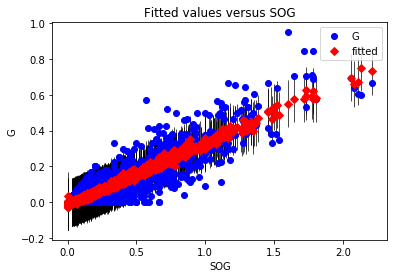

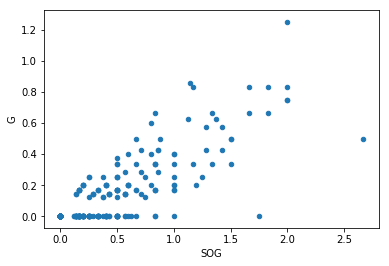

In [16]:
sm.graphics.plot_fit(fit, "SOG")
p = fit.params
ax = test.plot(x = "SOG", y = "G", kind = 'scatter')
#ax.plot(predictions, p.const + p.montifScore * predictions)

In [17]:
te = train[train.SOG < 2.3]
te = te[te.SOG > 1.9]
te.head()

,Player,Year,Position,Club,GP,GS,G,MINS,A,SHTS,SOG,FC,OFF,Y,R
414,David Villa,2015,Forward,New York City FC,30,29,0.600000,2514,0.266667,4.600000,2.133333,0.966667,1.566667,0.133333,0.0
415,David Villa,2016,Forward,New York City FC,33,32,0.696970,2869,0.121212,5.030303,2.060606,1.424242,1.242424,0.151515,0.0
1366,Sebastian Giovinco,2015,Midfielder,Toronto FC,33,32,0.666667,2775,0.484848,5.484848,2.212121,1.303030,1.030303,0.121212,0.0
1367,Sebastian Giovinco,2016,Midfielder,Toronto FC,28,28,0.607143,2418,0.535714,6.321429,2.107143,1.142857,1.035714,0.107143,0.0
1368,Sebastian Giovinco,2017,Midfielder,Toronto FC,25,25,0.640000,2057,0.240000,5.120000,2.080000,1.200000,0.400000,0.160000,0.0


In [18]:
year_2017 = players_adj['Year'] == "2017"
year_2016 = players_adj['Year'] == "2016"

temp2 = players_adj.append([players_adj[year_2017]]*3,ignore_index=True)
temp2 = temp2.append([players_adj[year_2016]]*2,ignore_index=True)

In [19]:
temp2[temp2.Player == "Miguel Almiron"]

,Player,Year,Position,Club,GP,GS,G,MINS,A,SHTS,SOG,FC,OFF,Y,R
1132,Miguel Almiron,2017,Midfielder,Atlanta United,30,27,0.300000,2394,0.466667,2.800000,1.166667,1.2,0.333333,0.133333,0.0
1133,Miguel Almiron,2018,Midfielder,Atlanta United,7,7,0.571429,628,0.571429,5.571429,1.428571,2.0,0.000000,0.285714,0.0
1821,Miguel Almiron,2017,Midfielder,Atlanta United,30,27,0.300000,2394,0.466667,2.800000,1.166667,1.2,0.333333,0.133333,0.0
2169,Miguel Almiron,2017,Midfielder,Atlanta United,30,27,0.300000,2394,0.466667,2.800000,1.166667,1.2,0.333333,0.133333,0.0
2517,Miguel Almiron,2017,Midfielder,Atlanta United,30,27,0.300000,2394,0.466667,2.800000,1.166667,1.2,0.333333,0.133333,0.0


In [20]:
y, X = patsy.dmatrices('G ~ GP + GS + MINS + A + SHTS + SOG + FC + OFF + Y + R', data=temp2, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 30 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:42:06   Log-Likelihood:                 3830.2
No. Observations:                3059   AIC:                            -7638.
Df Residuals:                    3048   BIC:                            -7572.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0022      0.004     -0.525      0.599      -0.010       0.006
GP            -0.0010      0.000     -2.574      0.010      -0.002      -0.000
GS            -0.0009      0.001     -0.665      0.506      -0.004       0.002
MINS        2.275e-05   1.72e-05      1.324      0.186    -1.1e-05    5.65e-05
A             -0.0289      0.012     -2.332      0.020      -0.053      -0.005
SHTS          -0.0237      0.004     -5.751      0.000      -0.032      -0.016
SOG            0.3702      0.010     37.897      0.000       0.351       0.389
FC            -0.0102      0.003     -3.173      0.002      -0.016      -0.004
OFF            0.0763      0.007     10.992      0.000       0.063       0.090
Y              0.0552      0.014      3.839      0.000       0.027       0.083
R             -0.0550      0.046     -1.188      0.235      -0.146       0.036
==============================================================================
Omnibus:                      463.160   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4979.831
Skew:                           0.355   Prob(JB):                         0.00
Kurtosis:                       9.210   Cond. No.                     6.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""